In [152]:
#Import some useful modules for upcoming works.
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 8)

# DATA PREPROCESSING

In [153]:
#Load Monday data set already cleaned and written again
df_mon=pd.read_csv(r"C:\Users\yc\Desktop\AIBadge\Attacks-AIBadge\df_mon.csv")

In [154]:
#Add a new column called "DayofWeek"
df_mon["DayofWeek"]="Monday"

In [155]:
#Load Tuesday data set already cleaned and written again
df_tue=pd.read_csv(r"C:\Users\yc\Desktop\AIBadge\Attacks-AIBadge\df_tue.csv")

In [156]:
#Add a new column called "DayofWeek"
df_tue["DayofWeek"]="Tuesday"

In [157]:
#Load Wednesday data set already cleaned and written again
df_wed=pd.read_csv(r"C:\Users\yc\Desktop\AIBadge\Attacks-AIBadge\df_wed.csv")

In [158]:
#Add a new column called "DayofWeek"
df_wed["DayofWeek"]="Wednesday"

In [159]:
#Load Thursday data set already cleaned and written again
df_thurs=pd.read_csv(r"C:\Users\yc\Desktop\AIBadge\Attacks-AIBadge\df_thurs.csv", low_memory=False)

In [160]:
#Add a new column called "DayofWeek"
df_thurs["DayofWeek"]="Thursday"

In [161]:
#Load Friday data set already cleaned and written again
df_fri=pd.read_csv(r"C:\Users\yc\Desktop\AIBadge\Attacks-AIBadge\df_fri.csv")

In [162]:
#Add a new column called "DayofWeek"
df_fri["DayofWeek"]="Friday"

In [163]:
#Append all days of data sets
data=pd.concat([df_mon, df_tue, df_wed, df_thurs, df_fri], sort=False, axis=0)

# Data Exploration

In [164]:
data.shape

(3118025, 76)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118025 entries, 0 to 703197
Data columns (total 76 columns):
SourceIP                   object
SourcePort                 float64
DestinationIP              object
DestinationPort            float64
Protocol                   float64
Timestamp                  object
FlowDuration               float64
TotalFwdPackets            float64
TotalBackwardPackets       float64
TotalLengthofFwdPackets    float64
TotalLengthofBwdPackets    float64
FwdPacketLengthMax         float64
FwdPacketLengthMin         float64
FwdPacketLengthMean        float64
FwdPacketLengthStd         float64
BwdPacketLengthMax         float64
BwdPacketLengthMin         float64
BwdPacketLengthMean        float64
BwdPacketLengthStd         float64
FlowBytes/s                object
FlowPackets/s              object
FlowIATMean                float64
FlowIATStd                 float64
FlowIATMax                 float64
FlowIATMin                 float64
FwdIATTotal       

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [166]:
data.shape

(3118025, 76)

from datetime import datetime

datetimeObj = datetime.strptime( '%I:%M:%S %p')
 
# Get the time object from datetime object
timeObj = datetimeObj.time()
    
 
print(timeObj)
print(type(timeObj))

# Drop Nulls

In [167]:
#Check which columns have null values
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

SourceIP                    288602
SourcePort                  288602
DestinationIP               288602
DestinationPort             288602
Protocol                    288602
Timestamp                   288602
FlowDuration                288602
TotalFwdPackets             288602
TotalBackwardPackets        288602
TotalLengthofFwdPackets     288602
TotalLengthofBwdPackets     288602
FwdPacketLengthMax          288602
FwdPacketLengthMin          288602
FwdPacketLengthMean         288602
FwdPacketLengthStd          288602
BwdPacketLengthMax          288602
BwdPacketLengthMin          288602
BwdPacketLengthMean         288602
BwdPacketLengthStd          288602
FlowBytes/s                 288640
FlowPackets/s               288602
FlowIATMean                 288602
FlowIATStd                  288602
FlowIATMax                  288602
FlowIATMin                  288602
FwdIATTotal                 288602
FwdIATMean                  288602
FwdIATStd                   288602
FwdIATMax           

It seems that we need to drop the column "CWEFlagCount".

In [168]:
data=data.drop(columns="CWEFlagCount")

In [169]:
#The percentage of the missing values is about less than 10% so we can drop them
#Drop null values for all data set
data.dropna(inplace=True)

In [170]:
#Check the number of colunms and row after drop the null values
data.shape

(2829385, 75)

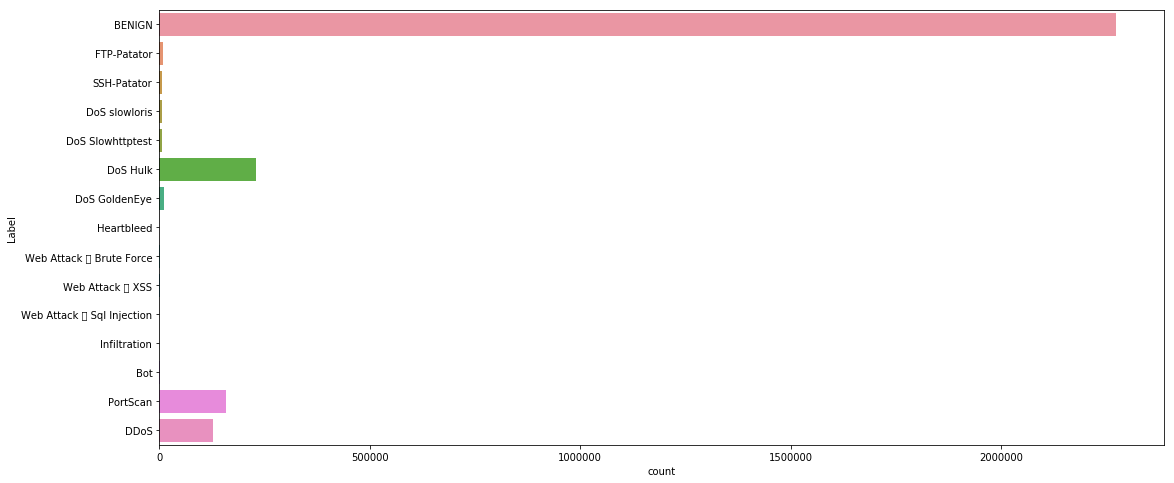

In [171]:
#Let's Explore the number of activities on entire data set.
ax = sns.countplot(y="Label", data=data)

It seems that BENIGN:Normal Activites are representing majority of the data set. 

In [172]:
#Let's count them more specificially
data.Label.value_counts()

BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                       36
Web Attack  Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

import datetime
data['dayofweek'] = data['Timestamp'].dt.dayofweek
#data[['Timestamp','dayofweek']].head()
data.head()

data['dayofweek_name'] = data['Timestamp'].dt.weekday_name
data[['Timestamp','dayofweek_name']].head()

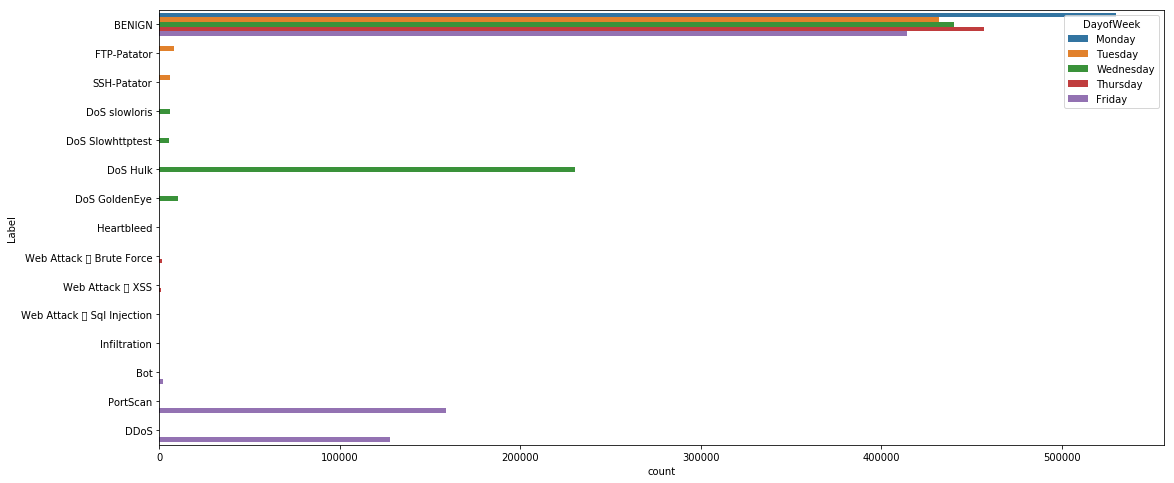

In [173]:
#Explore the dataset by grouping attacks for each day
ax = sns.countplot(y="Label", hue="DayofWeek", data=data)

In [174]:
#Filter dataset by count of attacks more than 100000
data=data.groupby("Label").filter(lambda x: len(x) > 100000)

In [175]:
data.Label.value_counts()

BENIGN      2272688
DoS Hulk     230124
PortScan     158930
DDoS         128027
Name: Label, dtype: int64

In [176]:
def label_to_numeric(x):
    if x=='BENIGN':
        return 1
    if x=='DoS Hulk':
        return 2
    if x=='PortScan':
        return 3
    if x=='DDoS':
        return 4

In [177]:
data['Label_num'] = data['Label'].apply(label_to_numeric)
data.head()

,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,...,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,DayofWeek,Label_num
0,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,3/7/2017 8:55,4.0,2.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Monday,1
1,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,3/7/2017 8:55,1.0,2.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Monday,1
2,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,3/7/2017 8:55,1.0,2.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Monday,1
3,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,3/7/2017 8:55,1.0,2.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Monday,1
4,8.253.185.121,80.0,192.168.10.14,49486.0,6.0,3/7/2017 8:56,3.0,2.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,Monday,1


#Create new binary columns from categorical column "Label"
dfDummies= pd.get_dummies(data['Label'], prefix = 'Label')

#Append new columns to our data set
data = pd.concat([data, dfDummies], axis=1)

In [129]:
#Create A new column called 'Attack' by reverse binary set  in "BENIGN"
data['Attack'] = np.where(data.Label =="BENIGN", 0, 1)
data.head()

,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,Timestamp,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,...,IdleMax,IdleMin,Label,DayofWeek,Label_BENIGN,Label_DDoS,Label_DoS GoldenEye,Label_DoS Hulk,Label_PortScan,Attack
0,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,2017-03-07 08:55:00,4.0,2.0,0.0,12.0,...,0.0,0.0,1,Monday,1,0,0,0,0,1
1,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,2017-03-07 08:55:00,1.0,2.0,0.0,12.0,...,0.0,0.0,1,Monday,1,0,0,0,0,1
2,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,2017-03-07 08:55:00,1.0,2.0,0.0,12.0,...,0.0,0.0,1,Monday,1,0,0,0,0,1
3,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,2017-03-07 08:55:00,1.0,2.0,0.0,12.0,...,0.0,0.0,1,Monday,1,0,0,0,0,1
4,8.253.185.121,80.0,192.168.10.14,49486.0,6.0,2017-03-07 08:56:00,3.0,2.0,0.0,12.0,...,0.0,0.0,1,Monday,1,0,0,0,0,1


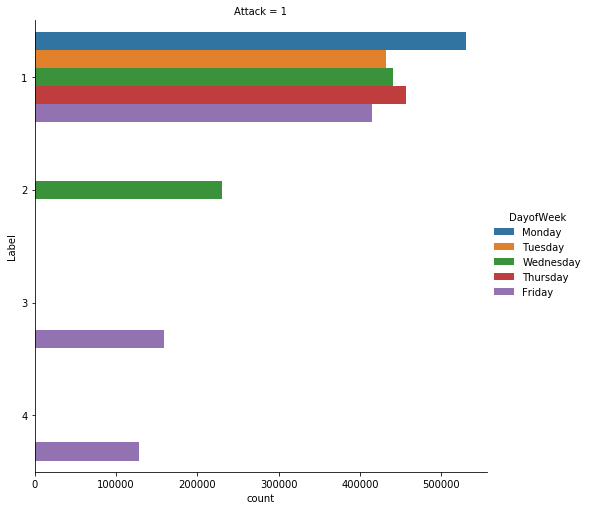

In [130]:
# Explore days with Attacks names or without Attack
g = sns.catplot(y="Label", hue="DayofWeek", col="Attack",
                 data=data, kind="count",height=7, aspect=1.0);

# OUTLIER DETECTION

In [123]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SourcePort                 2.671000e+04
DestinationPort            3.900000e+02
Protocol                   1.100000e+01
FlowDuration               2.697392e+06
TotalFwdPackets            3.000000e+00
TotalBackwardPackets       3.000000e+00
TotalLengthofFwdPackets    1.750000e+02
TotalLengthofBwdPackets    4.850000e+02
FwdPacketLengthMax         7.500000e+01
FwdPacketLengthMin         3.600000e+01
FwdPacketLengthMean        4.400000e+01
FwdPacketLengthStd         2.616295e+01
BwdPacketLengthMax         2.780000e+02
BwdPacketLengthMin         7.700000e+01
BwdPacketLengthMean        1.810000e+02
BwdPacketLengthStd         8.152186e+01
FlowIATMean                3.114693e+05
FlowIATStd                 6.192150e+05
FlowIATMax                 2.023776e+06
FlowIATMin                 6.000000e+01
FwdIATTotal                1.001147e+06
FwdIATMean                 1.510719e+05
FwdIATStd                  5.651560e+04
FwdIATMax                  6.367795e+05
FwdIATMin                  4.800000e+01


In [124]:
#Below code removes outliers based on the IQR range and stores the result in the data frame 'df_out'
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

TypeError: Invalid comparison between dtype=datetime64[ns] and float64

It seems that all Attacks were deleted by this elimination and also 2272688 - 613724=1658964 Beningn activities were deleted

In [28]:
print(2272688 - 613724)

1658964


In [29]:
df_out.Attack.value_counts()

0    613724
Name: Attack, dtype: int64

In [30]:
data.Attack.value_counts()

0    2272688
1     556697
Name: Attack, dtype: int64

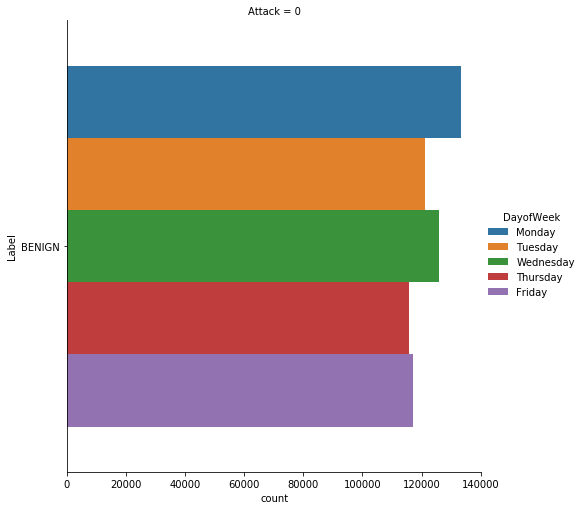

In [34]:
# Explore days with Attacks from filtered data by outliars
g = sns.catplot(y="Label", hue="DayofWeek", col="Attack",
                 data=df_out, kind="count",height=7, aspect=1.0);

As we eliminated the outliers by quantile range, only "BENIGN" activities were left. 

# Create a new data set from only "Time" and "Attack"
time_col=data[["Timestamp", "Attack", "DayofWeek"]]
#time = data.loc[:,time_col].values
time=pd.DataFrame(time_col)
time.head()

time = time.set_index('Timestamp')
time.index

#Let's assign weekdays for all months 
time['weekday'] = pd.to_datetime(time['Timestamp']).apply(lambda x: x.weekday())
time.head()

In [353]:
time.DayofWeek.value_counts()

Friday       703198
Wednesday    691695
Monday       529854
Thursday     458930
Tuesday      445708
Name: DayofWeek, dtype: int64

# Set login_time as index
time.set_index('Timestamp', inplace=True)
time['count'] = 1
time = time.resample('15T').sum() # count the logins for each 15 minutes.
time.tail()

#plot the login_time
time.plot(figsize=(10,10), linewidth=5, fontsize=10)
plt.xlabel('Timestamp', fontsize=10);

In [208]:
#Let's zoom in trends for each month
# Split by month into new dataframes
mon_df = time['2017-03-07 ':'2017-03-07']
mon_df.reset_index(drop=False, inplace=True)

tue_df = time['2017-04-07 ':'2017-05-07']
tue_df.reset_index(drop=False, inplace=True)

wed_df = time['2017-05-07 ':'2017-06-07']
wed_df.reset_index(drop=False, inplace=True)

thurs_df = time['2017-06-07 ':'2017-07-07']
thurs_df.reset_index(drop=False, inplace=True)

fri_df = time['2017-07-07 ':'2017-08-07']
fri_df.reset_index(drop=False, inplace=True)

In [196]:
tue_df =time['2017-04-07 ': '2017-04-07']
tue_df.reset_index(drop=False, inplace=True)

# Tuesday
x = tue_df['Timestamp']
y = tue_df[tue_df.Attack== 1]
plt.plot(x, y)
plt.title('Count of logins each 15-min for Monday')
plt.xticks(rotation=45);

# Wednesday
x = wed_df['Timestamp']
y = wed_df['Attack']
plt.plot(x, y)
plt.title('Count of logins each 15-min for Monday')
plt.xticks(rotation=45);

# Thursday
x = thurs_df['Timestamp']
y = thurs_df['Attack']
plt.plot(x, y)
plt.title('Count of logins each 15-min for Monday')
plt.xticks(rotation=45);

# Friday
x = fri_df['Timestamp']
y = fri_df['Attack']
plt.plot(x, y)
plt.title('Count of logins each 15-min for Monday')
plt.xticks(rotation=45);

# Create a new data set consisting of only numerical variables

In [178]:
data_num=data.select_dtypes(include=['number'])
data_num.head(10)

,SourcePort,DestinationPort,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label_num
0,80.0,49188.0,6.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,80.0,49188.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,80.0,49188.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,80.0,49188.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,80.0,49486.0,6.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,80.0,49486.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,80.0,49486.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,80.0,49486.0,6.0,1.0,2.0,0.0,12.0,0.0,6.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,1031.0,88.0,6.0,609.0,7.0,4.0,484.0,414.0,233.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,1032.0,88.0,6.0,879.0,9.0,4.0,656.0,3064.0,313.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [179]:
data_num.shape

(2789769, 69)

In [180]:
# Eliminating categorical numerical variables such as "SourcePort", "DestinationPort" and 
df_num=data_num.iloc[:,3:69]
df_num.head(10)

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label_num
0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,609.0,7.0,4.0,484.0,414.0,233.0,0.0,69.142857,111.967895,207.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,879.0,9.0,4.0,656.0,3064.0,313.0,0.0,72.888889,136.153814,1532.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [181]:
df_num=df_num.round(0).astype(int)

In [184]:
df_num.columns

Index(['FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets',
       'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets',
       'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean',
       'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin',
       'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowIATMean',
       'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean',
       'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'FwdHeaderLength',
       'BwdHeaderLength', 'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength',
       'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd',
       'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount',
       'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'SubflowFwdPackets',

In [183]:
df_num.shape

(2789769, 66)

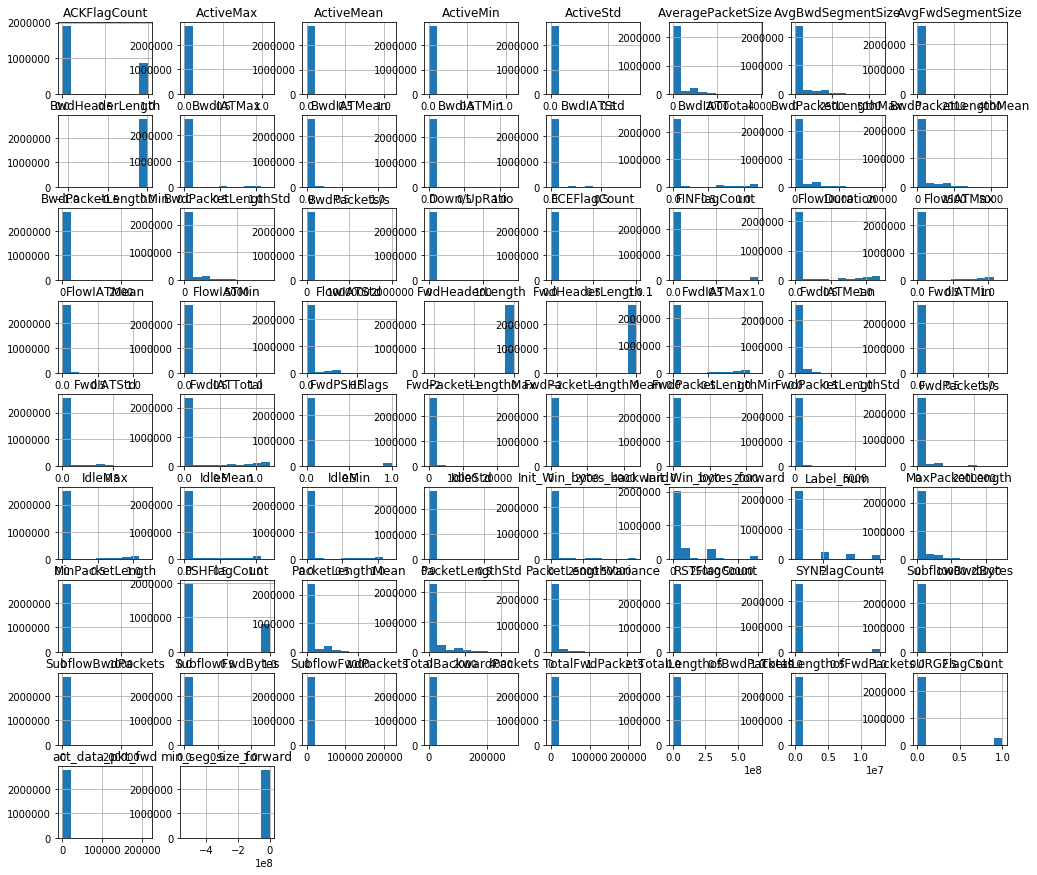

In [185]:
# Variables before stardardization
fig = plt.figure(figsize = (17,15))
ax = fig.gca()
df_num.hist(ax=ax)
plt.show()

In [31]:
no_attack = len(df_num[df_num['Attack'] == 0])

In [ ]:
attack_indices = df_num[df_num.Attack == 1].index

sns.pairplot(df_num)

In [32]:
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
df = scaler.fit_transform(df_num)

df = pd.DataFrame(df_num)

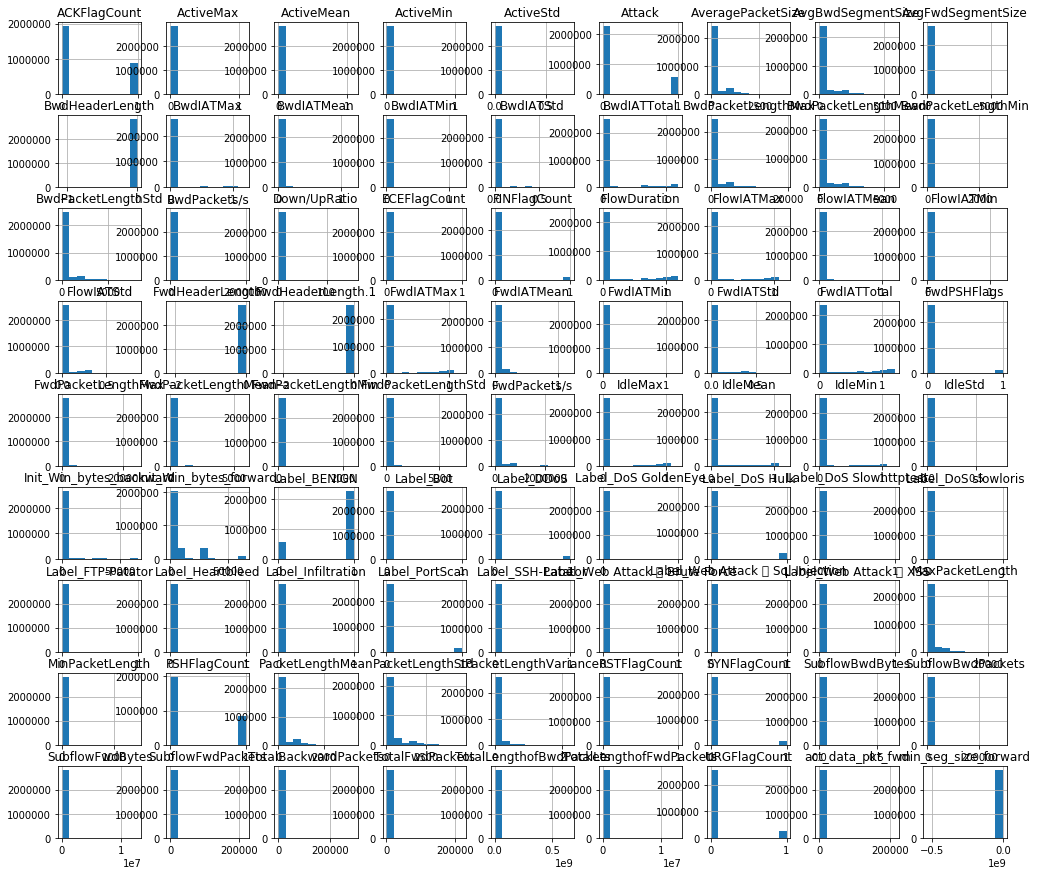

In [33]:
# Variables before stardardization
fig = plt.figure(figsize = (17,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [187]:
X = df_num.copy().drop(['Label_num'], axis=1)
y = df_num['Label_num'].copy()

In [190]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

In [191]:
#Split the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2231815, 65) (2231815,)
Test set: (557954, 65) (557954,)


In [192]:
#Import Library
from sklearn.neighbors import KNeighborsClassifier

ImportError: cannot import name 'LatentDirichletAllocation'

In [51]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

2829385

In [53]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.8426962042988141


In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

ImportError: cannot import name 'LatentDirichletAllocation'

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

In [50]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("\nTraining set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00

Training set score: 1.00
Test set score: 1.00


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
def adaboost(X_train, X_test, y_train):
    model = AdaBoostClassifier(n_estimators=100, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    return y_pred

In [79]:
# AdaBoost
y_baseline = adaboost(X_train, X_test, y_train)

In [93]:
# SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
y_smote = adaboost(X_train_sm, X_test, y_train_sm)

ImportError: cannot import name 'LatentDirichletAllocation'

In [83]:
y_train_sm.shape

(3182454,)

In [38]:
cols=X.columns

# Start working only data with Outliers

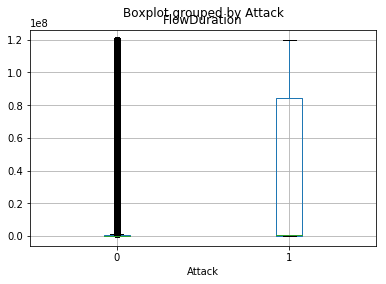

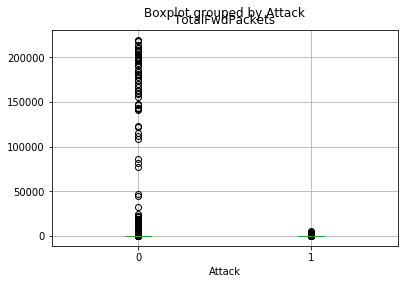

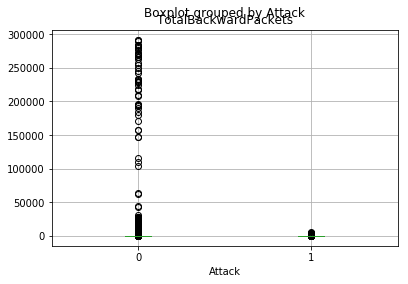

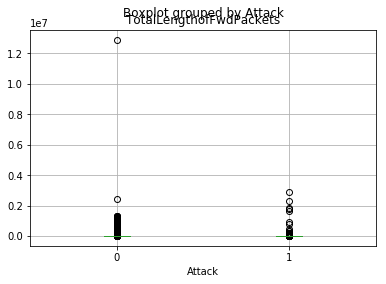

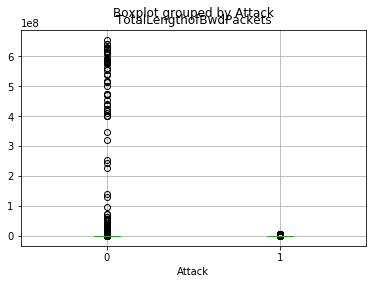

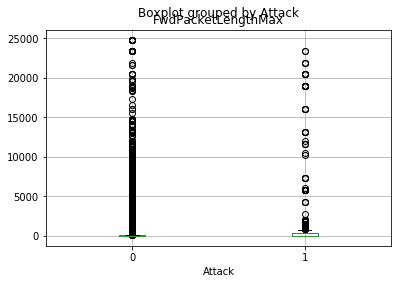

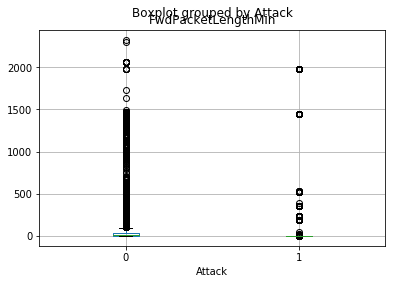

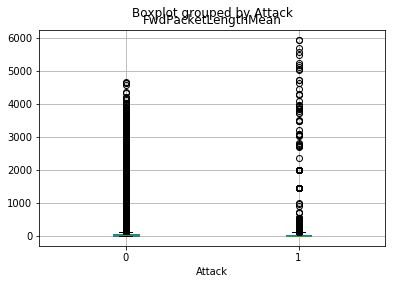

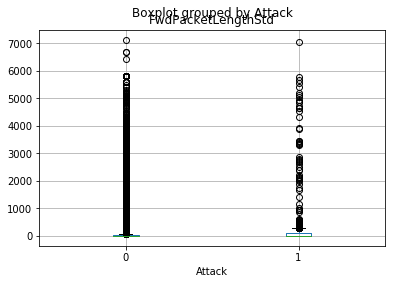

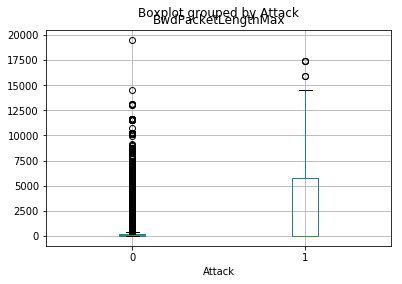

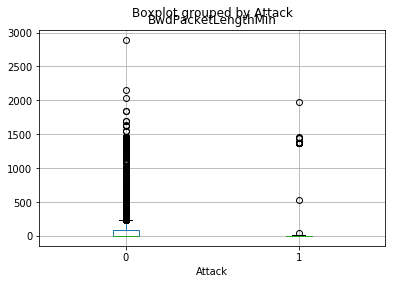

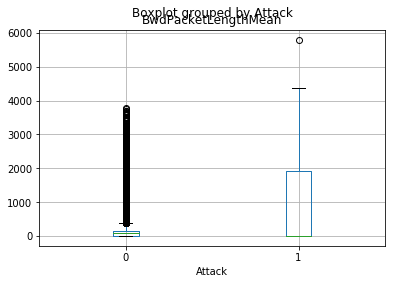

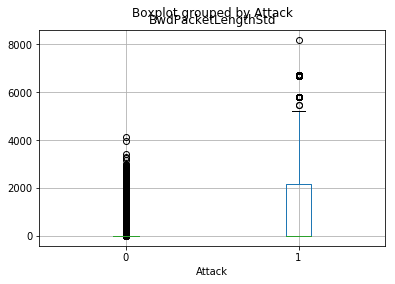

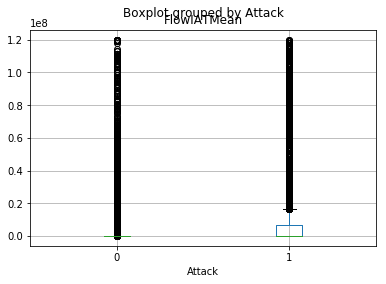

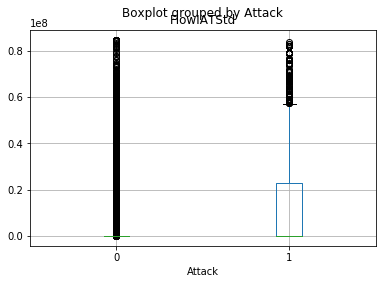

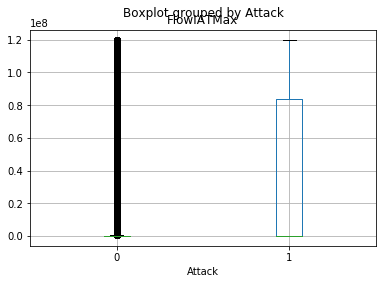

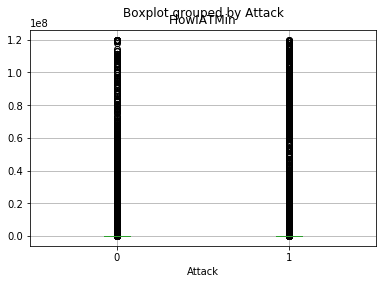

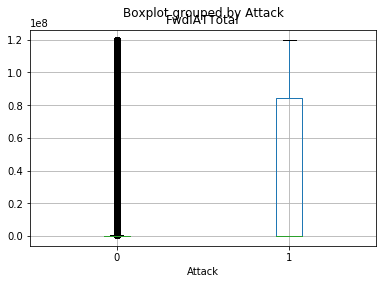

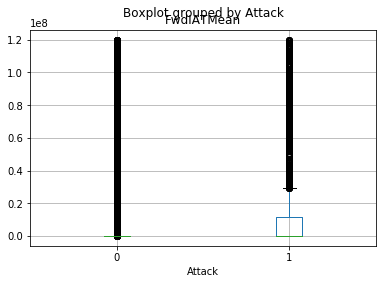

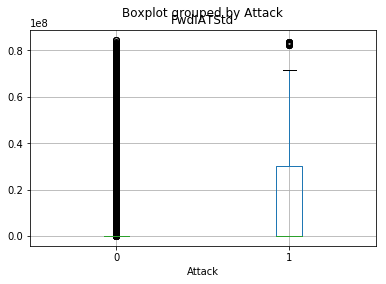

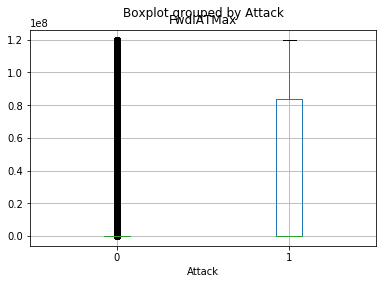

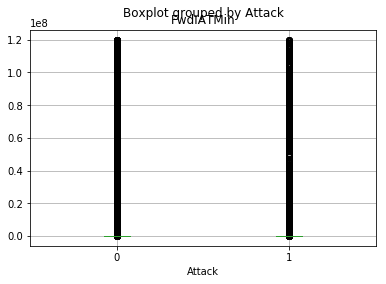

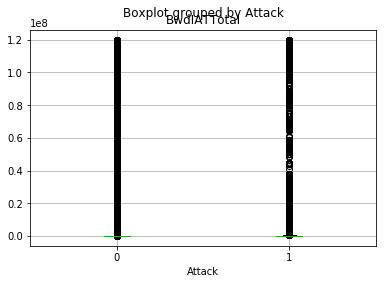

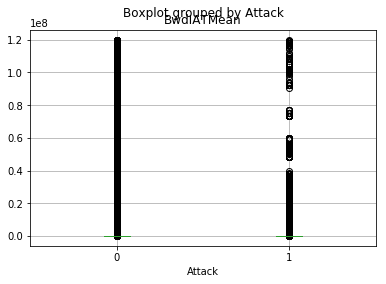

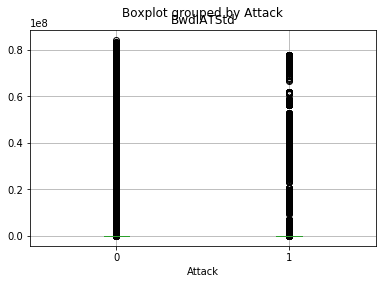

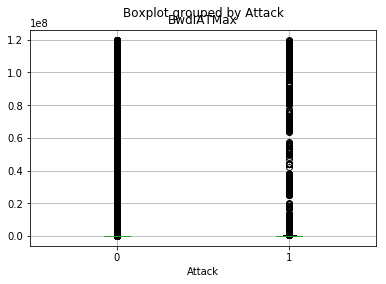

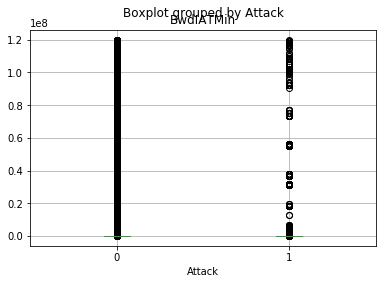

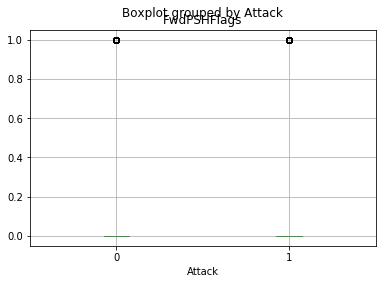

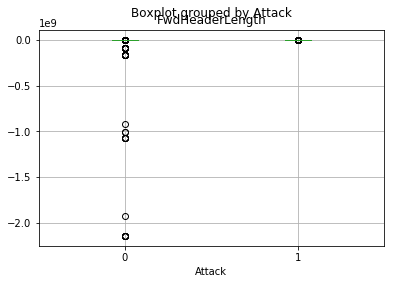

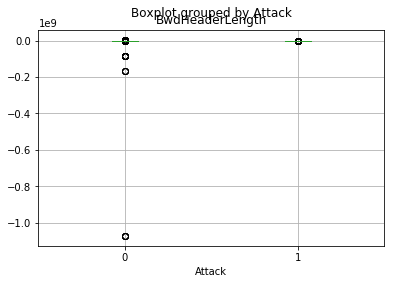

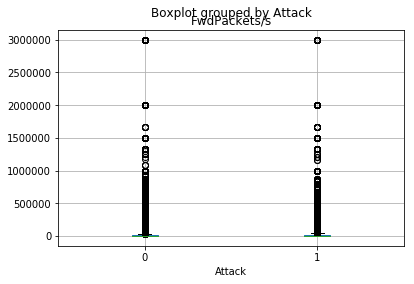

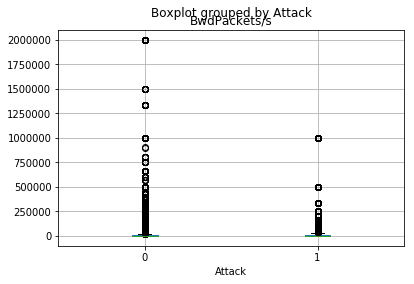

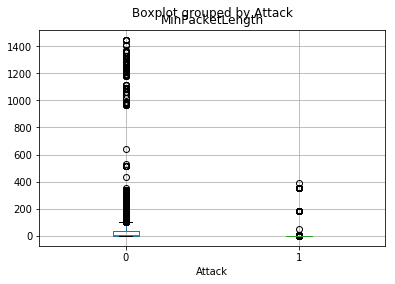

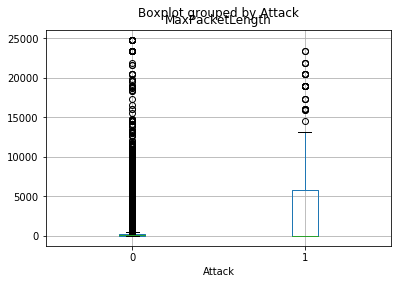

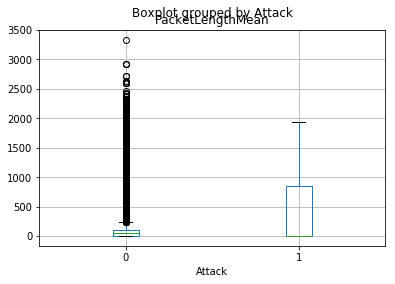

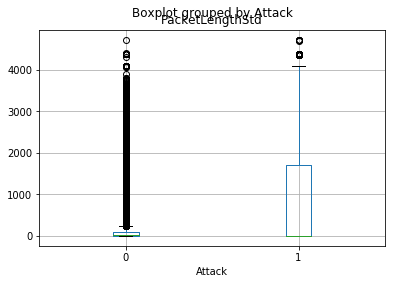

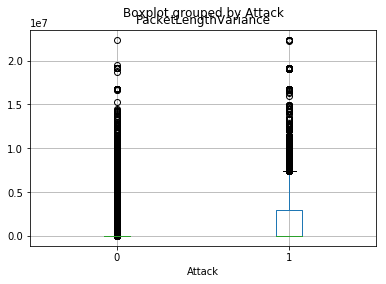

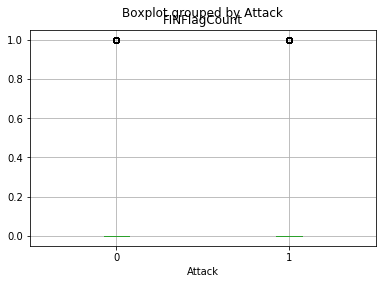

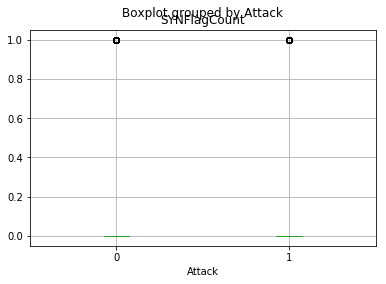

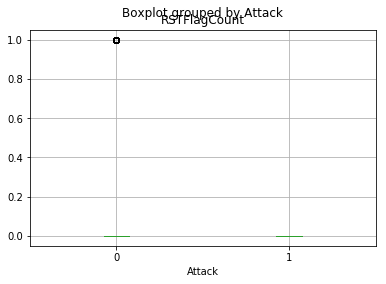

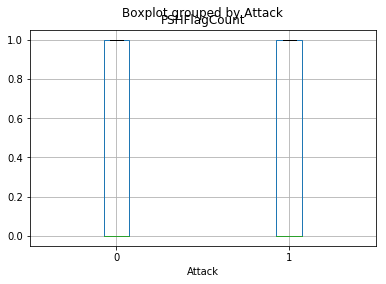

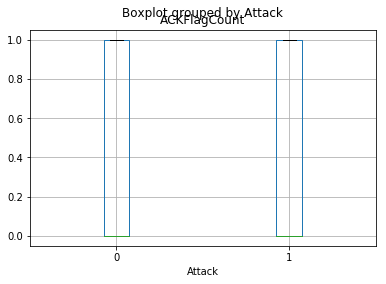

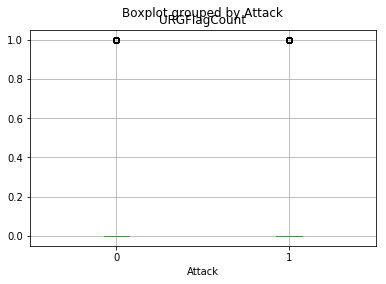

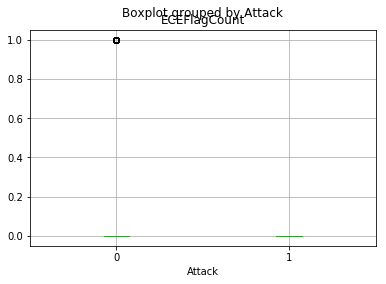

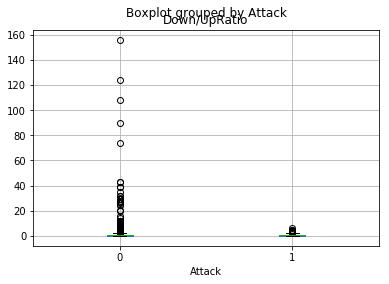

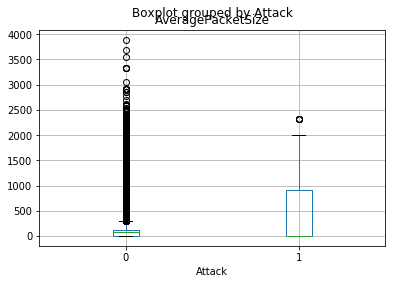

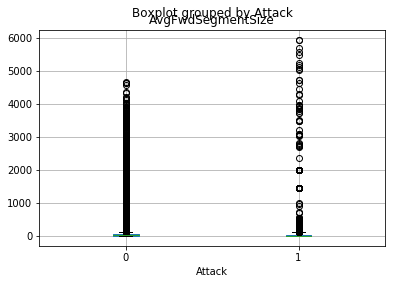

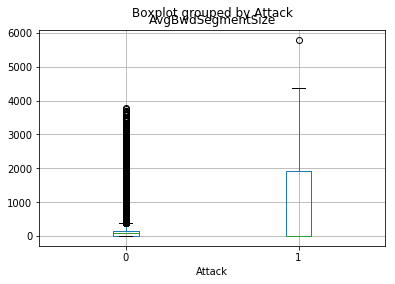

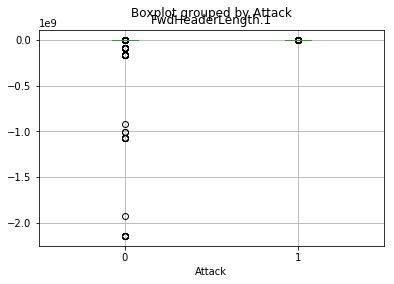

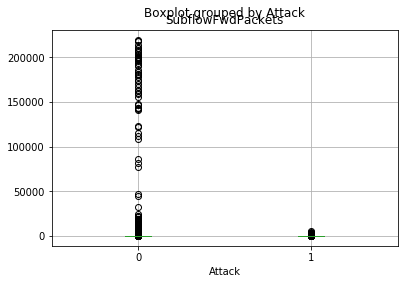

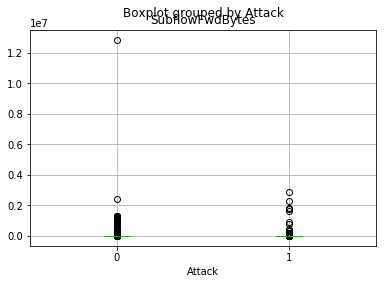

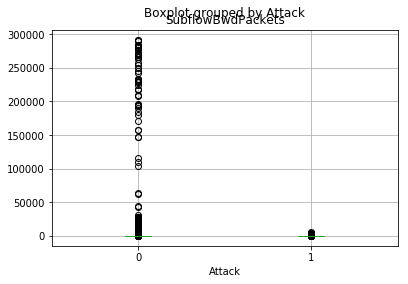

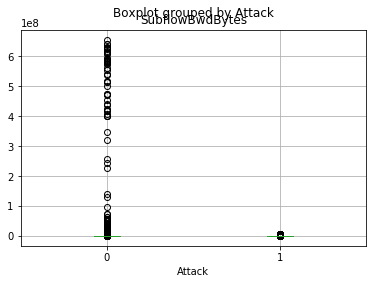

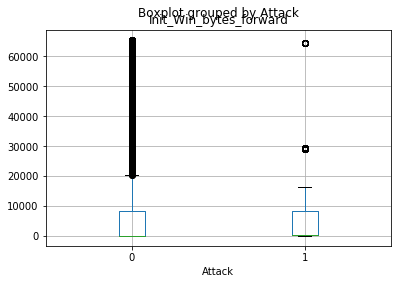

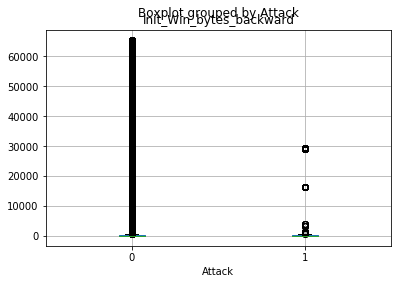

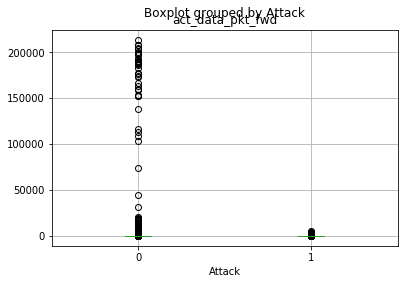

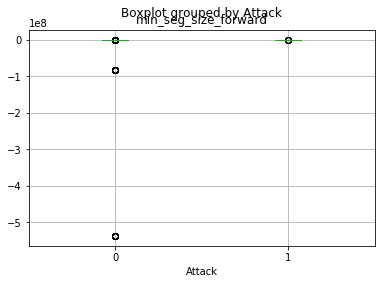

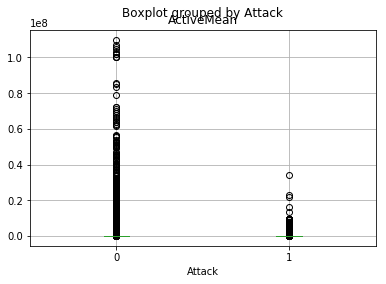

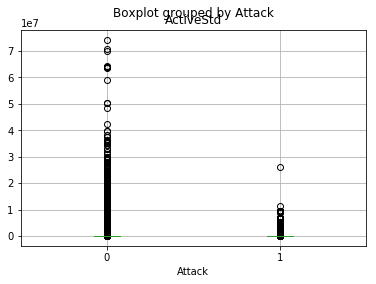

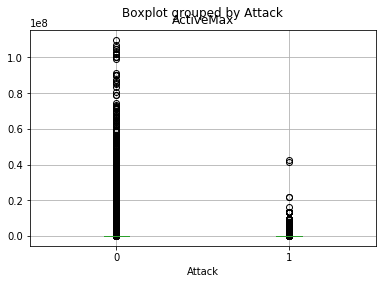

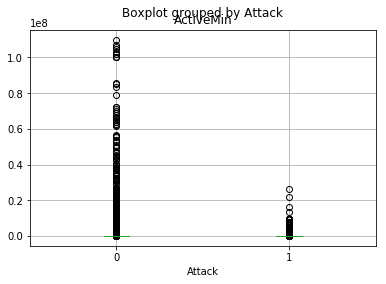

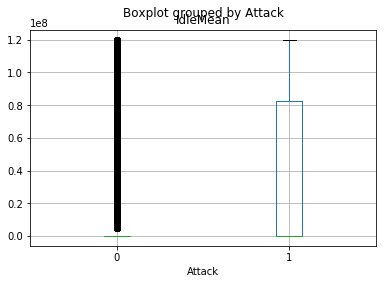

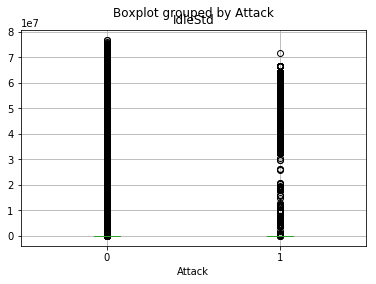

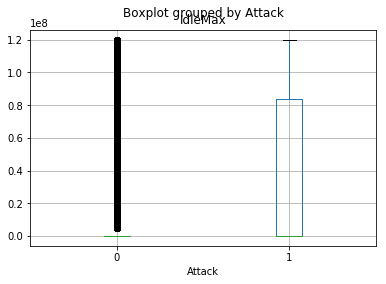

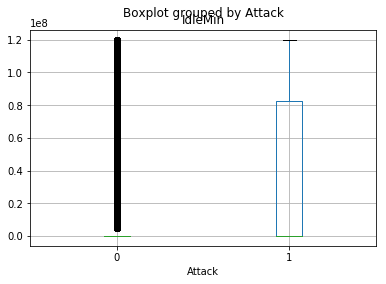

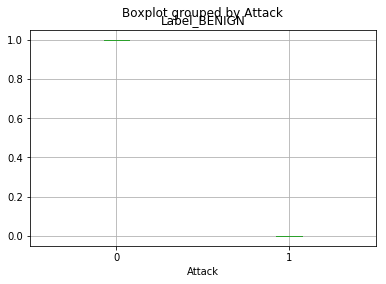

In [46]:
for column in cols:
    df_num.boxplot(column=column, by='Attack')

In [43]:
#Filter dataset having outliers
df_attack = df_num[((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_attack.shape)

(2196574, 81)


In [42]:
df_attack.columns

Index(['FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets',
       'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets',
       'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean',
       'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin',
       'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowIATMean',
       'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean',
       'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'FwdHeaderLength',
       'BwdHeaderLength', 'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength',
       'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd',
       'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount',
       'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'SubflowFwdPackets',

In [44]:
df_attack.Attack.value_counts()

0    1639877
1     556697
Name: Attack, dtype: int64

In [83]:
df_attack.head()

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,Label_DoS slowloris,Label_FTP-Patator,Label_Heartbleed,Label_Infiltration,Label_PortScan,Label_SSH-Patator,Label_Web Attack  Brute Force,Label_Web Attack  Sql Injection,Label_Web Attack  XSS,Attack
0,4,2,0,12,0,6,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,12,0,6,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,12,0,6,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,12,0,6,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,0,12,0,6,6,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X = df_attack.copy().drop(['Label_Bot', 'Label_DDoS',
       'Label_DoS GoldenEye', 'Label_DoS Hulk', 'Label_DoS Slowhttptest',
       'Label_DoS slowloris', 'Label_FTP-Patator', 'Label_Heartbleed',
       'Label_Infiltration', 'Label_PortScan', 'Label_SSH-Patator',
       'Label_Web Attack  Brute Force', 'Label_Web Attack  Sql Injection',
       'Label_Web Attack  XSS', 'Attack'], axis=1)
y = df_attack['Attack'].copy()

NameError: name 'df_attack' is not defined

In [94]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [86]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


ImportError: cannot import name 'LatentDirichletAllocation'

In [85]:
from sklearn.linear_model import LogisticRegression 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

NameError: name 'X_train_res' is not defined

In [92]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 


Before Undersampling, counts of label '1': 389896
Before Undersampling, counts of label '0': 1147705 



ImportError: cannot import name '_UnstableArchMixin'

In [64]:
#fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [65]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


In [66]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [68]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

1.0


Accuracy is:  0.9999964656651147


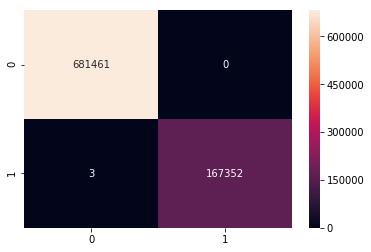

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train, y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [81]:
# Calculate the correlation matrix and take the absolute value
corr_matrix =df_num.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.80)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.80)]

# Drop the features in the to_drop list
df_num =df_num.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(df_num.shape[1]))

The reduced_df dataframe has 44 columns


In [69]:
X = df_num.copy().drop(['Label_Bot', 'Label_DDoS',
       'Label_DoS GoldenEye', 'Label_DoS Hulk', 'Label_DoS Slowhttptest',
       'Label_DoS slowloris', 'Label_FTP-Patator', 'Label_Heartbleed',
       'Label_Infiltration', 'Label_PortScan', 'Label_SSH-Patator',
       'Label_Web Attack  Brute Force', 'Label_Web Attack  Sql Injection',
       'Label_Web Attack  XSS', 'Attack'], axis=1)
y = df_num['Attack'].copy()

Accuracy is:  0.9988159978134248


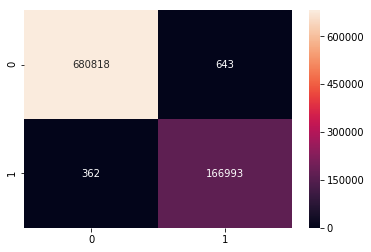

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train, y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
# Scale the Dataset


In [87]:
X = df_num.copy().drop(['Label_Bot', 'Label_DDoS',
       'Label_DoS GoldenEye', 'Label_DoS Hulk', 'Label_DoS Slowhttptest',
       'Label_DoS slowloris', 'Label_FTP-Patator', 'Label_Heartbleed',
       'Label_Infiltration', 'Label_PortScan', 'Label_SSH-Patator',
       'Label_Web Attack  Brute Force', 'Label_Web Attack  Sql Injection',
       'Label_Web Attack  XSS', 'Attack'], axis=1)
y = df_num['Attack'].copy()

In [70]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
df_scaled = feature_scaler.fit_transform(X)

In [73]:
from sklearn.ensemble import IsolationForest

AttributeError: type object 'sklearn.tree._criterion.array' has no attribute '__reduce_cython__'

Accuracy is:  0.9988159978134248


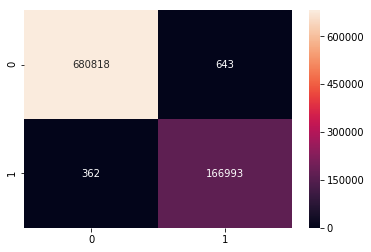

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train, y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [63]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

NameError: name 'RandomForestClassifier' is not defined

In [78]:
X_train.columns

Index(['FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets',
       'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets',
       'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean',
       'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin',
       'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowIATMean',
       'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean',
       'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'FwdHeaderLength',
       'BwdHeaderLength', 'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength',
       'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd',
       'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount',
       'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'ECEFlagCount',
       'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
       'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'SubflowFwdPackets',

In [79]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Standarzataion
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

NameError: name 'x_train' is not defined

In [86]:
from sklearn.decomposition import LatentDirichletAllocation
from imblearn.over_sampling import SMOTE


ImportError: cannot import name 'LatentDirichletAllocation'

In [77]:
# Assign response and target variable="Attack"

#Create A new column called 'Attack'
df_num['Attack'] = np.where(data.Label_BENIGN == 1, 0, 1)
df_num.head()

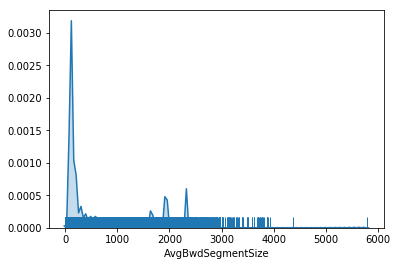

In [44]:
# Create a distplot of the Award Amount
sns.distplot(df_num.AvgBwdSegmentSize,
                hist=False,
                rug=True,
                kde_kws={'shade':True})

# Plot the results
plt.show()

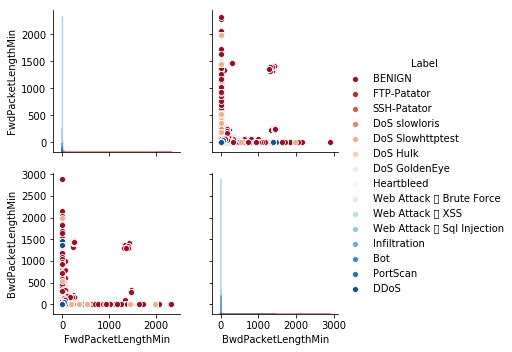

<Figure size 432x288 with 0 Axes>

In [68]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=data,
        vars=['FwdPacketLengthMin', 'BwdPacketLengthMin'],
        kind='scatter',
        hue='Label',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

# Scaling the data
If you look at the dataset you'll notice that it is not scaled well. For instance the some columns have values between 0 and 1, while most of the rest of the columns have higher values. Therefore, before training the algorithm, we will need to scale our data down.

In [52]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
df = feature_scaler.fit_transform(df_num)
#X_test = feature_scaler.transform(X_test)

In [58]:
cols=df_num.columns

In [69]:
X = df_num.copy().drop(['Label_Bot', 'Label_DDoS',
       'Label_DoS GoldenEye', 'Label_DoS Hulk', 'Label_DoS Slowhttptest',
       'Label_DoS slowloris', 'Label_FTP-Patator', 'Label_Heartbleed',
       'Label_Infiltration', 'Label_PortScan', 'Label_SSH-Patator',
       'Label_Web Attack  Brute Force', 'Label_Web Attack  Sql Injection',
       'Label_Web Attack  XSS', 'Attack'], axis=1)
y = df_num['Attack'].copy()

In [73]:
X.nunique()

FwdPacketLengthMin            384
BwdPacketLengthMin            583
FlowIATMin                 134083
BwdIATTotal                352800
BwdIATMax                  320110
BwdIATMin                   54991
BwdHeaderLength              3945
FwdPackets/s                 6925
BwdPackets/s                 4705
MinPacketLength               215
FINFlagCount                    2
SYNFlagCount                    2
PSHFlagCount                    2
ACKFlagCount                    2
URGFlagCount                    2
ECEFlagCount                    2
Down/UpRatio                   31
AvgFwdSegmentSize            2104
AvgBwdSegmentSize            2561
SubflowFwdBytes             17928
Init_Win_bytes_forward      12149
Init_Win_bytes_backward     13111
act_data_pkt_fwd             1093
min_seg_size_forward           28
ActiveStd                  165726
ActiveMax                  298750
ActiveMin                  175477
IdleStd                    128257
IdleMin                    192838
dtype: int64

In [71]:
X.FINFlagCount.value_counts()

0    2729282
1     100103
Name: FINFlagCount, dtype: int64

# Split Data Set into train and test set

Since we are using cross validation, we don't need to divide our data into training and test sets. We want all of the data in the training set so that we can apply cross validation on that. The simplest way to do this is to set the value for the test_size parameter to 0. This will return all the data in the training set as follows:

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=0)

In [69]:
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

# Holdout Validation Approach - Train and Test Set Split
The holdout validation approach refers to creating the training and the holdout sets, also referred to as the 'test' or the 'validation' set. The training data is used to train the model while the unseen data is used to validate the model performance. The common split ratio is 70:30, while for small datasets, the ratio can be 90:10.

In [70]:
# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,y, test_size=0.30, random_state=100)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 86.22%


# K-fold Cross-Validation
In k-fold cross-validation, the data is divided into k folds. The model is trained on k-1 folds with one fold held back for testing. This process gets repeated to ensure each fold of the dataset gets the chance to be the held back set. Once the process is completed, we can summarize the evaluation metric using the mean or/and the standard deviation.

In [51]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 80.32%


# Stratified K-fold Cross-Validation
Stratified K-Fold approach is a variation of k-fold cross-validation that returns stratified folds, i.e., each set containing approximately the same ratio of target labels as the complete data.

In [49]:
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X_train, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 80.32%


# Repeated Random Test-Train Splits
This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [53]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X_train,y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 80.31% (0.05%)


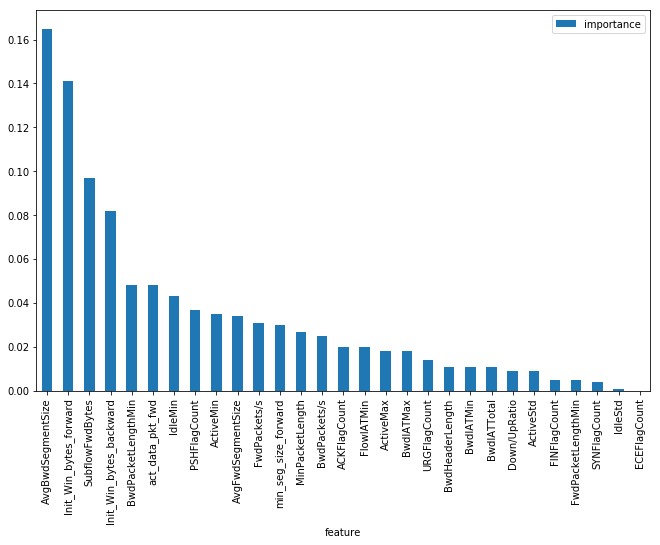

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 7)
importances.plot.bar();

In [43]:
importances.head(10)

,importance
feature,
AvgBwdSegmentSize,0.165
Init_Win_bytes_forward,0.141
SubflowFwdBytes,0.097
Init_Win_bytes_backward,0.082
BwdPacketLengthMin,0.048
act_data_pkt_fwd,0.048
IdleMin,0.043
PSHFlagCount,0.037
ActiveMin,0.035


In [ ]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight='balanced')
model2.fit(x_train_norm,y_train)

from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier(n_estimators=100)

# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

In [45]:
# Apply Logistic Regression before resampling

In [40]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

ValueError: Found array with 0 sample(s) (shape=(0, 29)) while a minimum of 1 is required.

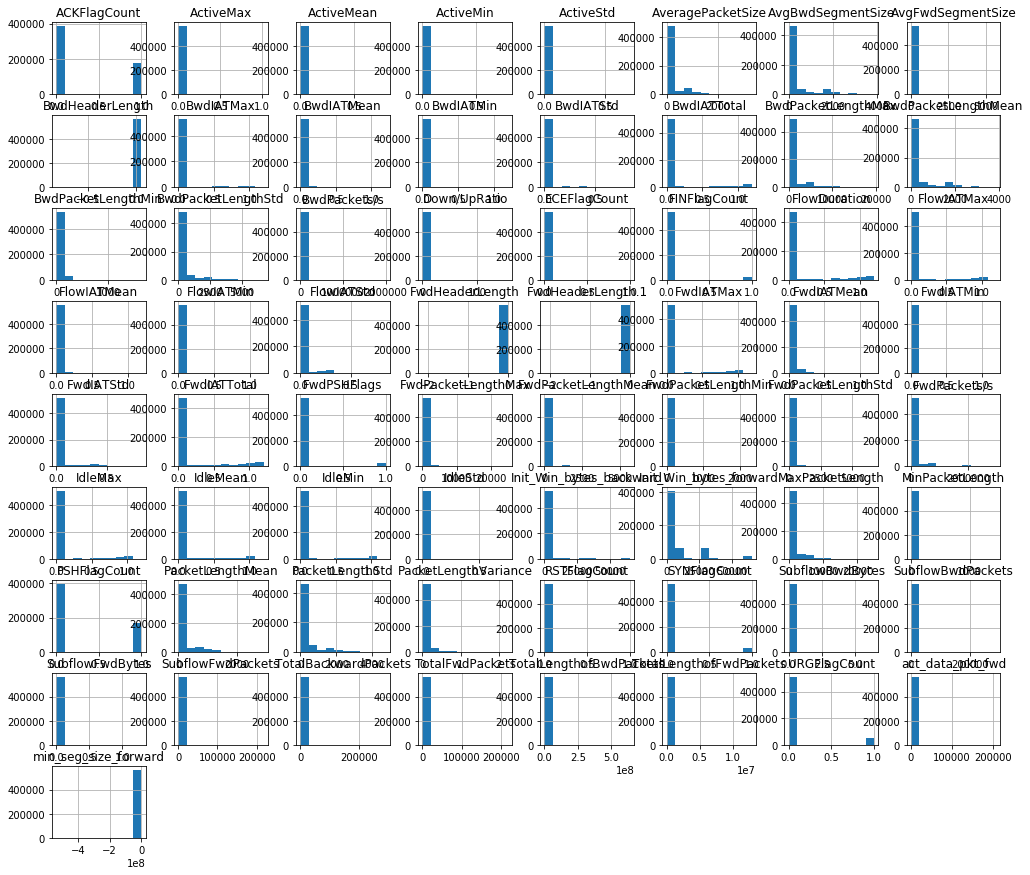

In [99]:
# Variables before stardardization
fig = plt.figure(figsize = (17,15))
ax = fig.gca()

X_train.hist(ax=ax)
plt.show()

# PCA 

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-2.071998,-0.049099,0.413070,-0.281314,0.018327,0.802191,-2.123058,0.112658,0.080692,-0.039726,...,0.001213,-1.127521e-07,-0.000030,-0.000004,-5.287353e-14,-1.189355e-12,-2.531107e-14,-3.360873e-14,-4.930255e-13,-2.864709e-14
1,-2.265575,-0.057930,0.487796,-0.395769,0.036748,1.336588,-3.478702,0.020934,0.454482,-0.031377,...,0.001084,3.289716e-04,-0.000043,-0.000001,5.721470e-11,-3.529697e-14,-8.044423e-16,-2.443248e-15,-2.218014e-14,-1.927809e-15
2,-2.265575,-0.057930,0.487796,-0.395769,0.036748,1.336588,-3.478702,0.020934,0.454482,-0.031377,...,0.001084,3.289716e-04,-0.000043,-0.000001,4.039171e-13,-5.827981e-13,-7.533801e-15,2.009699e-14,3.043066e-12,5.418254e-14
3,-2.265575,-0.057930,0.487796,-0.395769,0.036748,1.336588,-3.478702,0.020934,0.454482,-0.031377,...,0.001084,3.289716e-04,-0.000043,-0.000001,6.239089e-14,6.208813e-13,1.141972e-14,9.446564e-15,-8.131868e-13,-2.263313e-14
4,-2.093613,-0.050141,0.421778,-0.294533,0.020283,0.860532,-2.274130,0.104193,0.123254,-0.038667,...,0.001197,3.560751e-05,-0.000031,-0.000003,-2.467218e-13,-3.394361e-13,-2.468722e-14,-1.330718e-13,1.988683e-14,2.379383e-15


In [44]:
x_pca.shape

(2829385, 66)

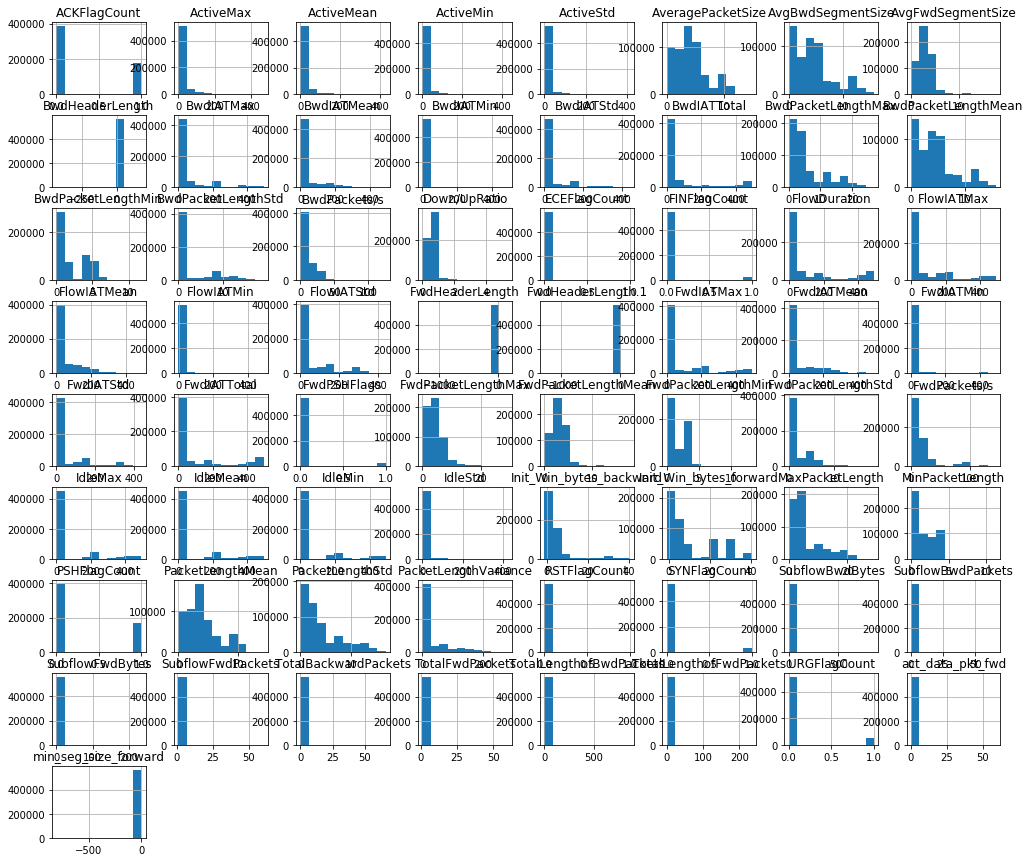

In [103]:
fig = plt.figure(figsize = (17,15))
ax = fig.gca()
df_pca = X_train.apply(np.cbrt)
df_pca.hist(ax=ax)
plt.show()

In [404]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.31695890e-01, 1.08831787e-01, 9.13085627e-02, 6.37585774e-02,
       4.82801014e-02, 4.65572916e-02, 4.34032241e-02, 3.63945241e-02,
       3.45847199e-02, 3.02440588e-02, 2.76168147e-02, 2.33732208e-02,
       2.19689929e-02, 2.03660934e-02, 1.89044761e-02, 1.67129788e-02,
       1.51450775e-02, 1.43412439e-02, 1.35962022e-02, 1.23470331e-02,
       1.16669021e-02, 1.15010567e-02, 9.56147183e-03, 8.65993217e-03,
       7.44080085e-03, 5.89191633e-03, 4.70780172e-03, 4.22851364e-03,
       3.86194660e-03, 2.76508948e-03, 1.72778489e-03, 1.52346667e-03,
       1.38945589e-03, 1.21273080e-03, 9.26988957e-04, 6.85439783e-04,
       6.28545031e-04, 4.14194070e-04, 3.53990602e-04, 2.92668912e-04,
       2.32617809e-04, 1.98842612e-04, 1.75531949e-04, 1.65638854e-04,
       9.88417148e-05, 5.37194284e-05, 4.36598414e-05, 3.83265166e-05,
       3.30249360e-05, 2.87858911e-05, 1.78170546e-05, 1.23365579e-05,
       8.97233521e-06, 7.91969146e-06, 4.87857324e-06, 4.14590058e-06,
      

In [48]:
df_pca.columns

RangeIndex(start=0, stop=66, step=1)

# Binary Imbalance

# Re-sampling the Dataset

In [104]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

0    454538
1    111339
Name: Attack, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [106]:
np.bincount(y_train)

array([454538, 454538], dtype=int64)

# Generate a correlation matrix for all the numerical variables
corr=x_pca.corr()
print(corr)

#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor =x_pca.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

RangeIndex(start=0, stop=64, step=1)

df_exp = df_num.apply(np.sqrt)   # pd.DataFrame.apply accepts a function to apply to each column of the data
df_exp.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

In [125]:
columns=df_num.columns

 - 'BwdHeaderLength', 'FwdHeaderLength', 'FwdHeaderLength.1', 'min_seg_size_forward' are left skewed, so To reduce left skewness, take squares or cubes or higher powers.
 - To reduce right skewness, take roots or logarithms or reciprocals (roots
    are weakest). This is the commonest problem in practice.

#df_num.index.to_numpy()
log_columns=('TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal',
       'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal',
       'BwdIATMean', 'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'FwdPackets/s', 'BwdPackets/s',
       'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean',
       'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount',
       'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount',
       'URGFlagCount', 'ECEFlagCount', 'Down/UpRatio', 'AveragePacketSize',
       'AvgFwdSegmentSize', 'AvgBwdSegmentSize',
       'SubflowFwdPackets', 'SubflowFwdBytes', 'SubflowBwdPackets',
       'SubflowBwdBytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'act_data_pkt_fwd','ActiveMean', 'ActiveStd',
       'ActiveMax', 'ActiveMin', 'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin',
       'Attack')




 

# Create the pandas DataFrame with columns with log transformation
df_log = pd.DataFrame(df_num, columns =log_columns) 

df_sqrt = np.sqrt(df_log)
df_sqrt.head()

sq_columns=('BwdHeaderLength', 'FwdHeaderLength', 'FwdHeaderLength.1', 'min_seg_size_forward')
# Create the pandas DataFrame with columns with log transformation
df_sq = pd.DataFrame(df_num, columns =sq_columns) 

df_sq=np.square(df_sq)

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
log=PowerTransformer()
# Instantiate PowerTransformer
log.fit(df_log)
#df_log =log.transform(df[[log_columns]])

In [59]:
df_log=log.transform(df_log)

In [176]:
# Train the transform on the data
#log.fit(df_num[['TotalBackwardPackets']])

# Apply the power transform to the data
#df_num['TotalBackwardPackets_log'] = log.transform(df_num[['TotalBackwardPackets']])

In [147]:
#df_num.plot(kind='density', subplots=True, layout=(65,65), sharex=False)
# plt.show()

#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()